In [1]:
import warnings
warnings.filterwarnings("ignore")

import os, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, glob
from pynwb import NWBHDF5IO
from pathlib import Path
from convnwb.io import load_nwbfile
from scipy.ndimage import gaussian_filter1d

import sys
sys.path.append('../code/ephys_qc')

from ephys_utills import get_et_timebins, compute_pixelperDVA, et_heatmap


In [2]:
sess_files = sorted(glob.glob('../data/000623/sub-CS53*/*.nwb'))
for sess_file in sess_files:
    nwbfile, io = load_nwbfile(os.path.basename(sess_file), os.path.dirname(sess_file), return_io=True)
    break
nwbfile

Data type,int64
Shape,"(603,)"
Array size,4.71 KiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(603,)"
Array size,4.71 KiB
Chunk shape,None


In [70]:
SEC2MSEC = 1000.
nwb_input_dir = '../data/000623/'

# ----- Basic metadata info about the video stimulus -----
frame_width, frame_height, vid_fps, nframes = 640, 480, 25.0, 11971

frame_duration_msec = SEC2MSEC / vid_fps
framesize = [frame_width, frame_height]

# define a duration to timebin the ET data
########################################################################################################################################################################## divided by vid_fps
timebin_sec = 1.0/vid_fps # define here as sec. used for saving results
timebin_msec = timebin_sec * SEC2MSEC # millisec.

nbins = np.round(frame_duration_msec * nframes / timebin_msec).astype(int)

nwb_session_files = sorted(glob.glob(os.path.join(nwb_input_dir, 'sub-*/*.nwb')))

# ----- Read ET (gaze) data from the NWB files -----
etdata_ses = []
pixel_dva_ses = []
missingdata_ratio = []
session_ids_et = []
select_subj_id, i = 0, 0
for session_ii in nwb_session_files:

    if not 'P54CSR1' in session_ii:
        continue

    print(f'processing {os.path.basename(session_ii)}...')

    # Open the NWB file and read its content
    with NWBHDF5IO(session_ii,'r') as nwb_io: 
        nwbfile = nwb_io.read()
        
        session_ids_et.append(nwbfile.identifier)
        
        trials_df = nwbfile.trials.to_dataframe()
        enc_start_time = trials_df[trials_df['stim_phase']=='encoding']['start_time'].values[0]
        enc_stop_time = trials_df[trials_df['stim_phase']=='encoding']['stop_time'].values[0]
        
        gaze_data = nwbfile.processing['behavior']['EyeTracking']['SpatialSeries']
        gaze_xy = np.asarray(gaze_data.data)
        
        if gaze_data.rate is None:
            gaze_time = gaze_data.timestamps
        else:
            gaze_time = np.arange(0,len(gaze_xy))/(gaze_data.rate) + gaze_data.starting_time
        gaze_encoding = np.logical_and(gaze_time >= enc_start_time, 
                                        gaze_time <= enc_stop_time) 
    
        gaze_df = pd.DataFrame(data=np.c_[gaze_time[gaze_encoding],gaze_xy[gaze_encoding,:]],
                                columns=['RecTime','GazeX','GazeY'])    
    
        # get video display info and scale gaze to stimulus size
        display_info_raw = gaze_data.comments
        screen_wh, display_wh, display_area_i = display_info_raw.split('::')
    
        screen_w, screen_h = list(map(float,screen_wh.split('=')[1].split(',')))
        display_w, display_h = list(map(float,display_wh.split('=')[1].split(',')))
        display_area = list(map(float,display_area_i.split('=')[1].split(',')))
    
        _, pixel_dva_mean = compute_pixelperDVA([screen_w,screen_h])
        pixel_dva_ses.append(pixel_dva_mean)
    
        scale_dx = frame_width / display_w
        scale_dy = frame_height / display_h
    
        gaze_df['GazeX'] = (gaze_df['GazeX'] - display_area[0])*scale_dx 
        gaze_df['GazeY'] = (gaze_df['GazeY'] - display_area[1])*scale_dy 
    
        problem_inds_x = np.logical_not(gaze_df['GazeX'].astype(float).between(0,frame_width,
                                                                                inclusive='left'))
        
        problem_inds_y = np.logical_not(gaze_df['GazeY'].astype(float).between(0,frame_height,
                                                                                inclusive='left'))
        problem_inds = np.logical_or(problem_inds_x, problem_inds_y)
        gaze_df.loc[problem_inds,['GazeX','GazeY']] = np.nan
        
        # Downsample gaze data to the video frame rate
        et_xy_binned = get_et_timebins(gaze_df, timebin_msec, do_op=None,
                                        fix_length=True, nbins=nbins, keep_timebin_index=False,
                                        )
        
        et_xy_binned_v = np.vstack(et_xy_binned)
        missingdata_ratio.append(np.isnan(et_xy_binned_v).any(axis=1).sum() / et_xy_binned_v.shape[0])
        
        et_xy_binned = np.asarray(et_xy_binned, dtype=object)
        etdata_ses.append(et_xy_binned)


processing sub-CS54_ses-P54CSR1_behavior+ecephys.nwb...


11971 second bins
Combined shape: (239419, 2)


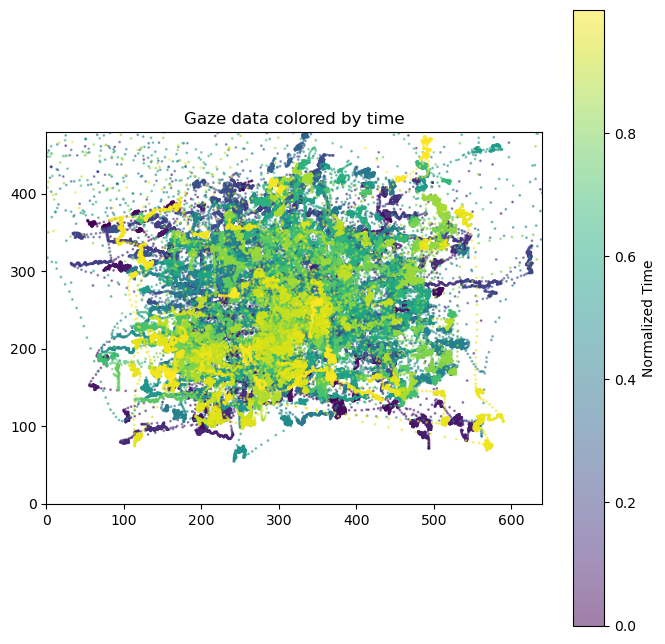

In [49]:
subj_EG_sec = etdata_ses[0] # get P54CSR1 gaze data
print(f'{len(subj_EG_sec)} second bins')

# stack all timepoints from all bins
all_timepoints = np.vstack(subj_EG_sec)
print(f'Combined shape: {all_timepoints.shape}')  # (total_samples, 2)

# identify valid points
valid_points = ~np.isnan(all_timepoints[:, 0]) & ~np.isnan(all_timepoints[:, 1])

# make time coloring
time_colors = np.linspace(0, 1, all_timepoints.shape[0])

# plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set(title='Gaze data colored by time', xlim=(0, frame_width), ylim=(0, frame_height))
ax.set_aspect('equal')

# scatter valid points with time-based color
sc = ax.scatter(all_timepoints[valid_points, 0], all_timepoints[valid_points, 1],
                c=time_colors[valid_points], cmap='viridis', s=1, alpha=0.5)

# colorbar
cbar = plt.colorbar(sc, ax=ax, label='Normalized Time')

plt.show()


In [ ]:
print(f'et_xy_binned (n_frames, ):', et_xy_binned.shape)
print(f'et_xy_binned[0] (n_samples_per_frame, n_coords):', et_xy_binned[0].shape)

# stack all samples across all frames
et_ts = np.vstack(et_xy_binned)
print('et_ts (n_samples, n_coords):', et_ts.shape)

# take just the last sample from each frame
et_frames = np.array([bin_vals[-1] for bin_vals in et_xy_binned])
print('et_frames (n_frames, n_coords):', et_frames.shape)

et_xy_binned (n_frames, ): (11971,)
et_xy_binned[0] (n_samples_per_frame, n_coords): (20, 2)
et_ts (n_samples, n_coords): (239419, 2)
et_frames (n_frames, n_coords): (11971, 2)


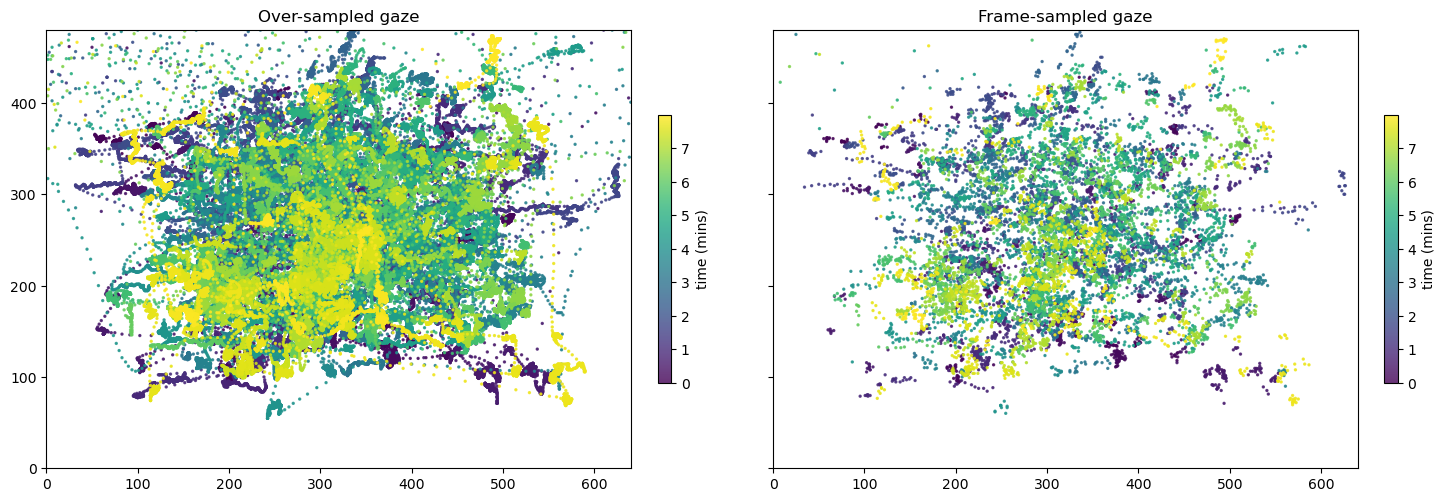

In [99]:
# remove NaNs
et_ts_valid_pts = ~np.isnan(et_ts[:, 0]) & ~np.isnan(et_ts[:, 1])
et_frames_valid_pts = ~np.isnan(et_frames[:, 0]) & ~np.isnan(et_frames[:, 1])

# make time values in minutes
sample_rate = 25  # samples per second
times_ts = np.arange(et_ts.shape[0]) / sample_rate / 20 / 60  # minutes
times_frames = np.arange(et_frames.shape[0]) / sample_rate / 60  # minutes

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)

axs[0].set(title='Over-sampled gaze', xlim=(0, frame_width), ylim=(0, frame_height))
axs[0].set_aspect('equal')
sc0 = axs[0].scatter(et_ts[et_ts_valid_pts, 0], et_ts[et_ts_valid_pts, 1],
                     c=times_ts[et_ts_valid_pts], cmap='viridis', s=2, alpha=0.8)

axs[1].set(title='Frame-sampled gaze', xlim=(0, frame_width), ylim=(0, frame_height))
axs[1].set_aspect('equal')
sc1 = axs[1].scatter(et_frames[et_frames_valid_pts, 0], et_frames[et_frames_valid_pts, 1],
                     c=times_frames[et_frames_valid_pts], cmap='viridis', s=2, alpha=0.8)

# separate colorbars
cbar0 = plt.colorbar(sc0, ax=axs[0], label='time (mins)', fraction=0.02, pad=0.04)
cbar1 = plt.colorbar(sc1, ax=axs[1], label='time (mins)', fraction=0.02, pad=0.04)

plt.tight_layout()
plt.show()


In [100]:
import cv2
import torch

# Load the YOLOv5 model (pre-trained)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' is the small model

# Read the video
cap = cv2.VideoCapture("your_video.mp4")
frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_count = 0

# Initialize empty lists for storing gaze and object information
gaze_frames = []
object_detections = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection on the frame
    results = model(frame)
    
    # Get the bounding boxes and classes
    boxes = results.xyxy[0].numpy()  # (x1, y1, x2, y2, confidence, class)
    
    # Store gaze and object info
    gaze_frames.append(et_frames[frame_count])  # Assuming gaze data corresponds to the frame count
    object_detections.append(boxes)

    frame_count += 1
    if frame_count > len(et_frames) - 1:
        break

cap.release()


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/nuttidalab/.cache/torch/hub/master.zip
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/nuttidalab/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-4-28 Python-3.11.11 torch-2.7.0+cu126 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20144MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 113MB/s]



Exception: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.